In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering #s
from sklearn.metrics import silhouette_score #silhueta e cotovelo sempre lembrar 
from sklearn.metrics import calinski_harabasz_score #indíce por densidade, quanto maior melhor
import time
import missingno as msno
import pickle

NPS - Net Promoter Score é um indicador de valiação do grau de satisfação de seu serviço, neste caso ao invés de analisar como o cliente se relaciona com o serviço, será analisado a relação do grau de satisfação do funcionário interno como grau de serviço que ele avalia na empresa que trabalha, sendo um projeto de Agrupamento na área de RH, utilizando aplicações de análise e ciência de dados.

utilizando como metodologia CRISP-DM como referência para trabalharmos com os dados que se encontram no link "link kaggle"

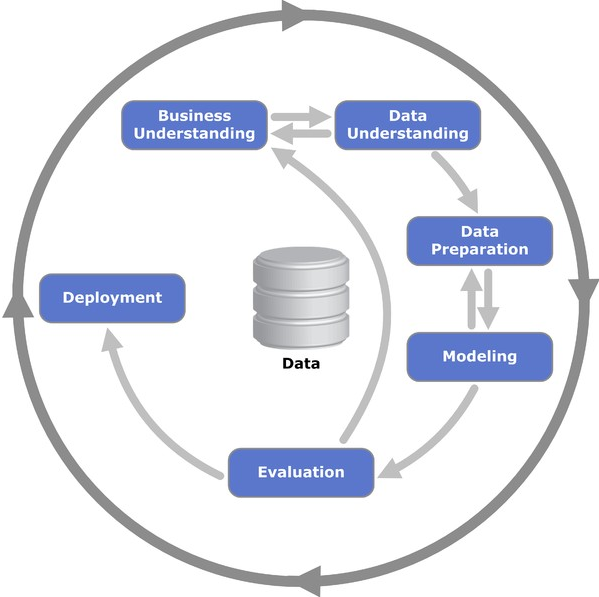

In [47]:
from IPython.display import Image
Image('imagem_crisp_dm.png')

# 1. Data Understanding


In [48]:
df_funcionarios, df_pesquisa_funcionarios, df_pesquisa_gestores = pd.read_csv('tb_funcionarios.csv'), pd.read_csv('tb_pesquisa_funcionarios.csv'), pd.read_csv('tb_pesquisa_gestores.csv')

In [49]:
df_fun = pd.merge(df_funcionarios, df_pesquisa_funcionarios, on='IDDoEmpregado', how='left') #mergear pelo id do empregado as bases
abt = pd.merge(df_fun, df_pesquisa_gestores, on='IDDoEmpregado', how='left') #mergear pelo id do empregado as bases

In [50]:
abt.head(3) #abt = tabela analítica de modelagem

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3


hipótese : o quanto é o percentual dos funcionários que estão com baixa insatisfação no trabalho e no ambiente

C:\Users\user\AppData\Local\Temp\ipykernel_3568\1754779108.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=total_by_rotatividade, x='Rotatividade', y='Percent', palette=cores, dodge=False)


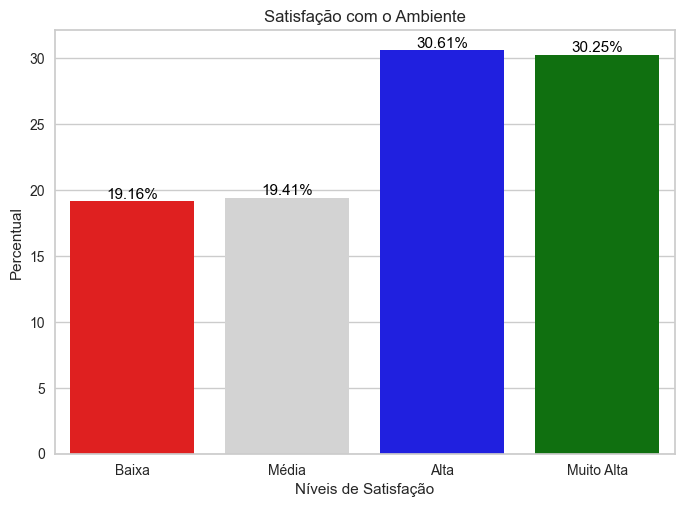

In [51]:
rotatividade_counts = abt['SatisfacaoComAmbiente'].value_counts()
# Calculando os percentuais de rotatividade
percent_1 = (rotatividade_counts[1] / len(abt)) * 100 #Avaliação baixa
percent_2 = (rotatividade_counts[2] / len(abt)) * 100 #Avaliação média
percent_3 = (rotatividade_counts[3] / len(abt)) * 100 #Avaliação alta
percent_4 = (rotatividade_counts[4] / len(abt)) * 100 #Avaliação muito alta

total_by_rotatividade = pd.DataFrame({
    'Rotatividade': ['Baixa', 'Média', 'Alta', 'Muito Alta'],
    'Percent': [percent_1, percent_2, percent_3, percent_4]
})

cores = {'Baixa': 'red', 'Média': 'lightgrey', 'Alta': 'blue', 'Muito Alta': 'green'}

ax = sns.barplot(data=total_by_rotatividade, x='Rotatividade', y='Percent', palette=cores, dodge=False)

for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Níveis de Satisfação')
plt.ylabel('Percentual')
plt.title('Satisfação com o Ambiente')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3568\949235615.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=total_by_rotatividade, x='Rotatividade', y='Percent', palette=cores, dodge=False)


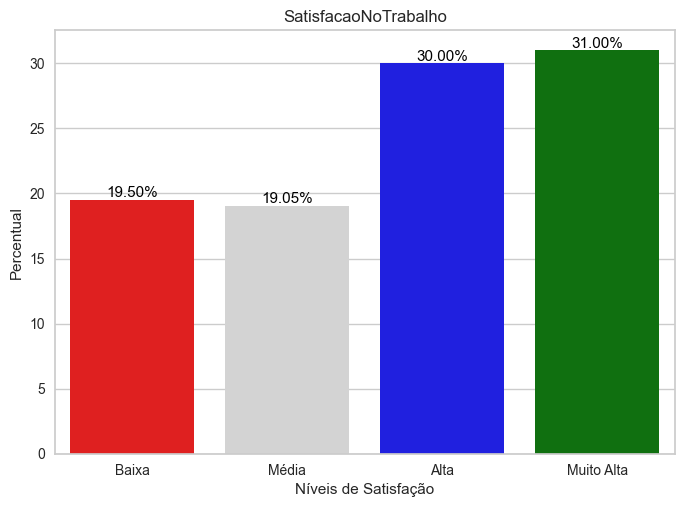

In [52]:
rotatividade_counts = abt['SatisfacaoNoTrabalho'].value_counts()
# Calculando os percentuais de rotatividade
percent_1 = (rotatividade_counts[1] / len(abt)) * 100 #Avaliação baixa
percent_2 = (rotatividade_counts[2] / len(abt)) * 100 #Avaliação média
percent_3 = (rotatividade_counts[3] / len(abt)) * 100 #Avaliação alta
percent_4 = (rotatividade_counts[4] / len(abt)) * 100 #Avaliação muito alta

total_by_rotatividade = pd.DataFrame({
    'Rotatividade': ['Baixa', 'Média', 'Alta', 'Muito Alta'],
    'Percent': [percent_1, percent_2, percent_3, percent_4]
})

cores = {'Baixa': 'red', 'Média': 'lightgrey', 'Alta': 'blue', 'Muito Alta': 'green'}

ax = sns.barplot(data=total_by_rotatividade, x='Rotatividade', y='Percent', palette=cores, dodge=False)

for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Níveis de Satisfação')
plt.ylabel('Percentual')
plt.title('SatisfacaoNoTrabalho')
plt.show()

pelos os dois resultados podemos criar as seguintes hipóteses:

    - cerca de 20% dos funcionários da empresa estão diminuindo o nosso NPS interno 
    - cerca de 20% dos funcionários podem ser um exponencial de alguma modificação na estrutura para que sua nota melhore
    - cerca de 60% componhe o peso da nota 

º Indicador do Objetivo: estimando um modelo que possa prever para iniciativas pelo RH

In [53]:
abt.describe()

,Idade,DistanciaDeCasa,Educacao,ContagemDeEmpregados,IDDoEmpregado,NivelDoCargo,RendaMensal,NumeroDeEmpresas,AumentoPercentualSalario,HorasPadrao,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,13005.862585,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,9413.777712,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,2018.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,5822.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,9838.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,16760.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,39998.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [54]:
# Metadados referente ao conjunto de dados 
# Nesse primeiro momento, analisa-se os tipos de cada variável assim como preenchimento e cardinalidade
def metadados(dataframe):
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False) # o false ordena as dados mais mal preenchida para a melhor preenchida
    
    metadata = metadata.reset_index(drop=True)

    return metadata

In [55]:
metadados(abt) #olhar a quantidade de nulos 

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,EquilibrioTrabalhoVida,float64,38,0.86,4
1,SatisfacaoComAmbiente,float64,25,0.57,4
2,SatisfacaoNoTrabalho,float64,20,0.45,4
3,NumeroDeEmpresas,float64,19,0.43,10
4,TotalDeAnosTrabalhados,float64,9,0.20,40
5,MaiorDe18,object,0,0.00,1
6,EnvolvimentoNoTrabalho,int64,0,0.00,4
7,AnosComAtualGestor,int64,0,0.00,18
8,AnosDesdeUltimaPromocao,int64,0,0.00,16
9,AnosNaEmpresa,int64,0,0.00,37


## separando variáveis categóricas de variáveis numéricas

In [56]:
abt_id = pd.DataFrame((abt['SatisfacaoNoTrabalho'].fillna(abt['SatisfacaoNoTrabalho'].median())).astype(int))
abt_num = abt.select_dtypes(exclude='object')
abt_cat = abt.select_dtypes(include='object')

# 3. Data Prep

tratando os nulos de  variáveis numéricas

<Axes: >

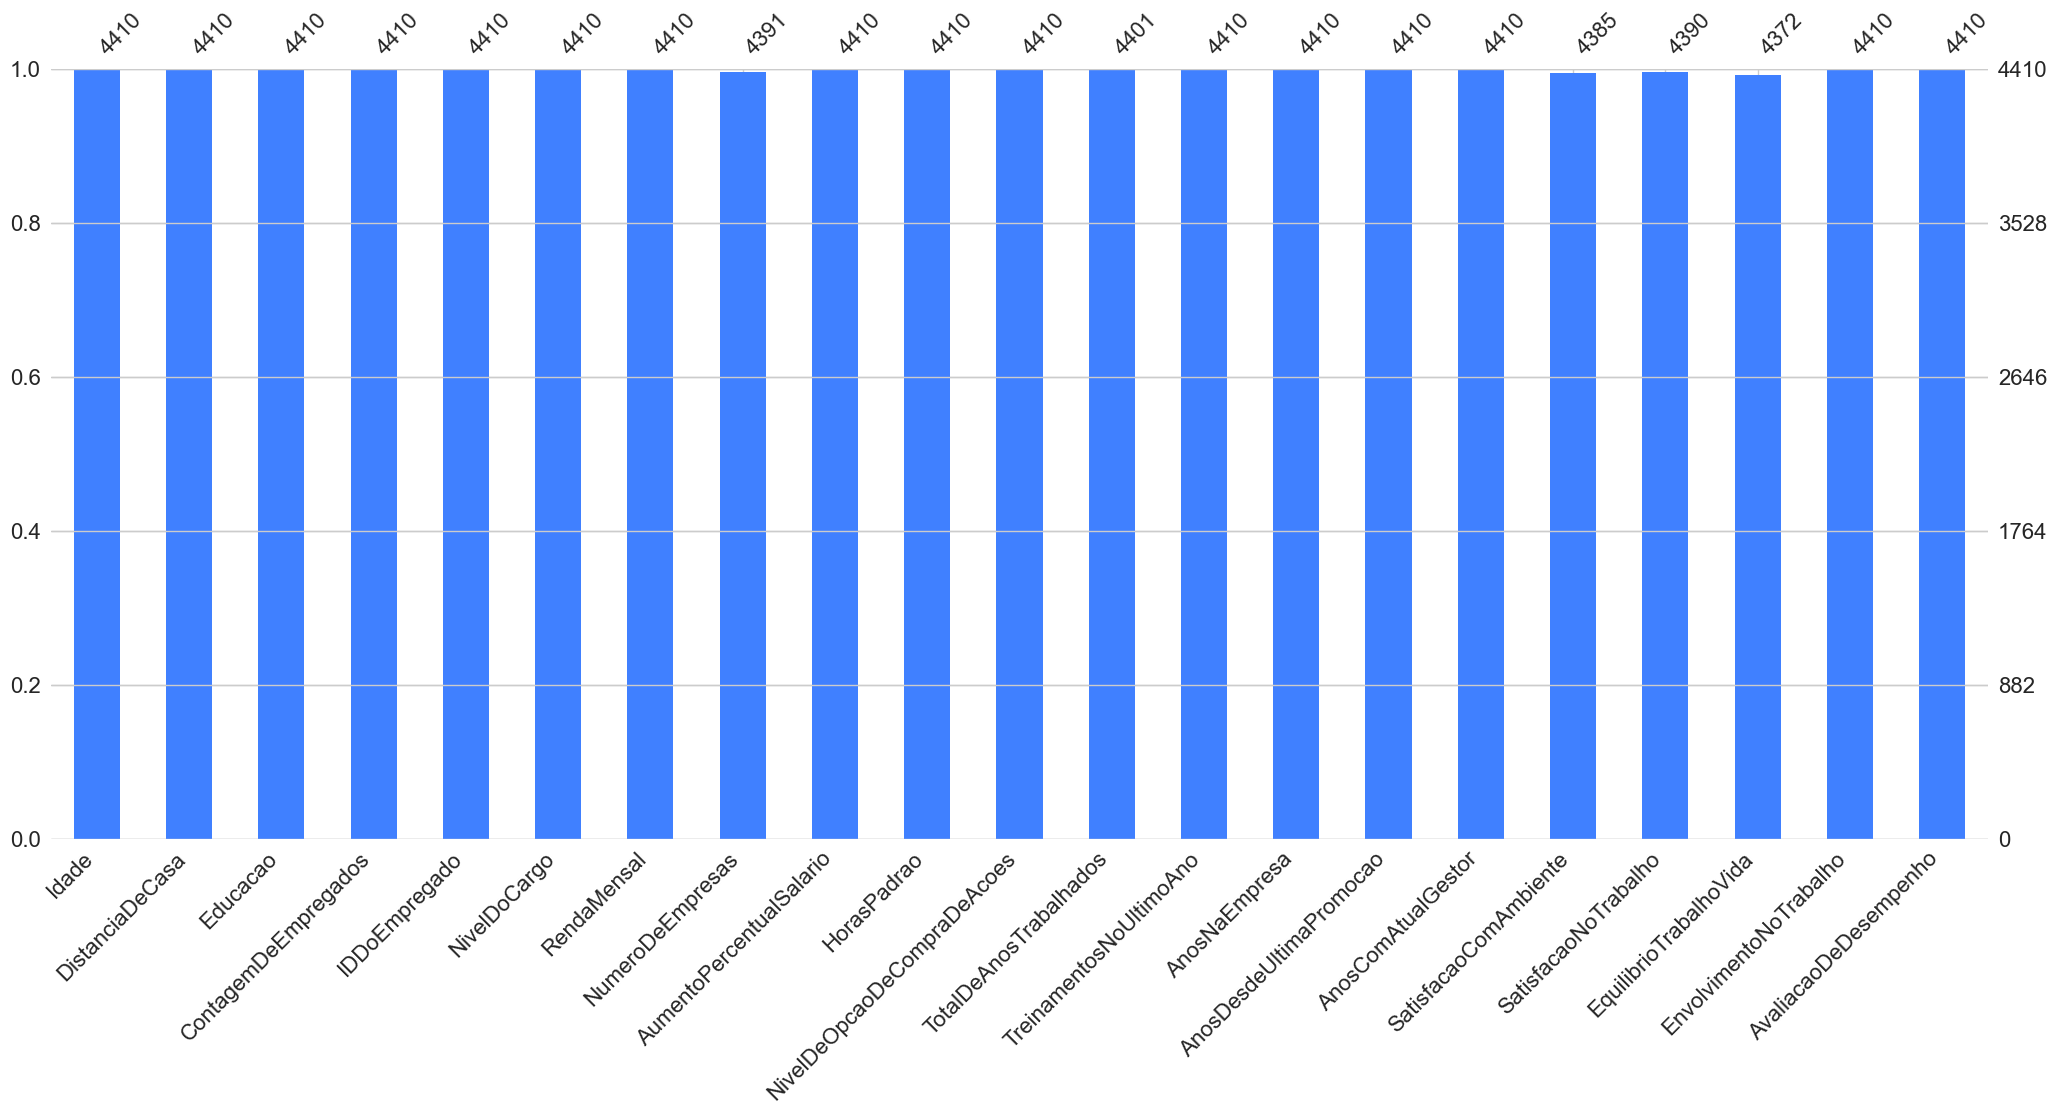

In [57]:
msno.bar(abt_num, color=(0.25, 0.5, 1))  

ou seja as colunas EquilibrioTrabalhoVida, SatisfacaoComAmbiente, SatisfacaoNoTrabalho, NumeroDeEmpresas, TotalDeAnosTrabalhados são as colunas com valores nulos que não chega até 10% de sua coluna logo vamos substituir por algum valor

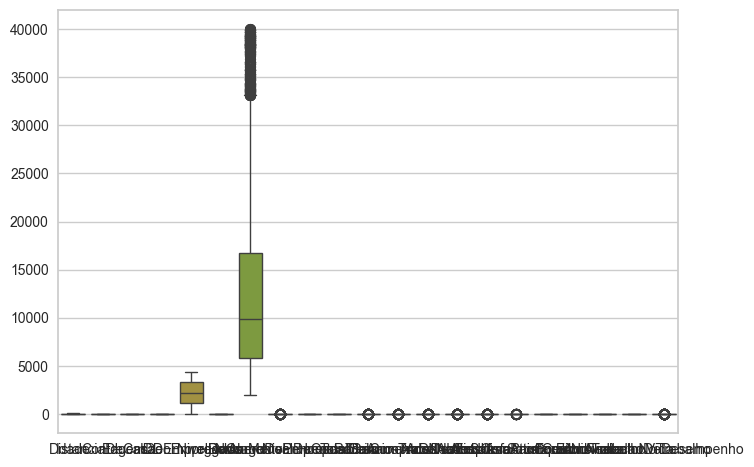

<Figure size 11000x6000 with 0 Axes>

In [58]:
# Tamanho do gráfico em polegadas
sns.boxplot(abt)
plt.figure(figsize =(110, 60))
plt.show()

com a verificação de outliers(valores discrepantes), indica um faotr do melhor valor a se preencher, no qual a média é mais sensível na presença de outliers, logo torna melhor pela mediana 

In [59]:
abt_01 = abt_num.fillna(abt_num.select_dtypes(include=['float64', 'int64','int32']).median())

In [60]:
abt_01.head()

,Idade,DistanciaDeCasa,Educacao,ContagemDeEmpregados,IDDoEmpregado,NivelDoCargo,RendaMensal,NumeroDeEmpresas,AumentoPercentualSalario,HorasPadrao,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,51,6,2,1,1,1,26232.0,1.0,11,8,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,10,1,1,2,1,8378.0,0.0,23,8,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,17,4,1,3,4,38656.0,1.0,15,8,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,2,5,1,4,3,16642.0,3.0,11,8,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,10,1,1,5,1,4684.0,4.0,12,8,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


<Axes: >

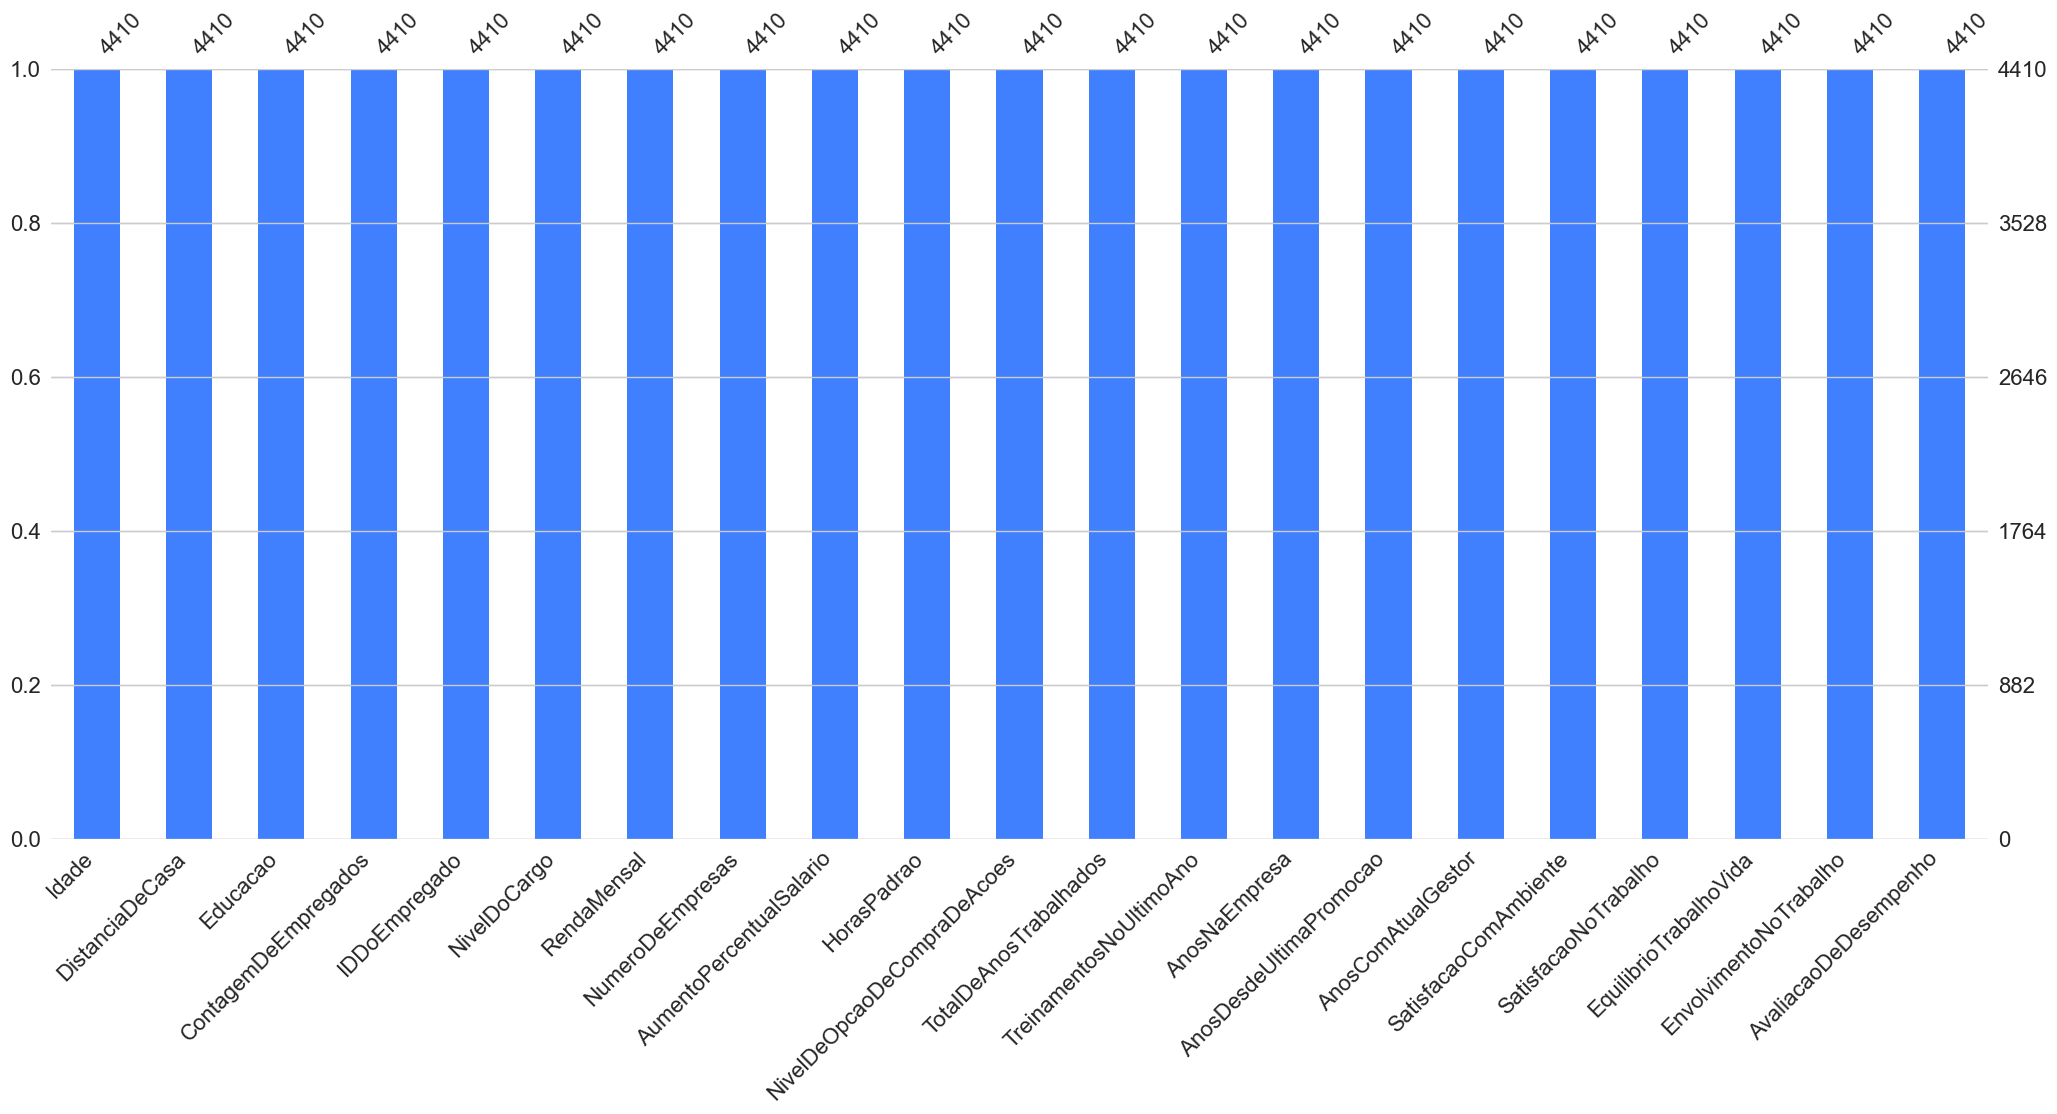

In [61]:
msno.bar(abt_01, color=(0.25, 0.5, 1))  

normalização de uma mesma escala robustscaler = x-median / IQR(q3-q1)


In [62]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import pandas as pd


# Define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), #categórica preenchida com a moda dos valores categóricos
    ('onehot', OneHotEncoder(drop='first'))
])

# Define numerical pipeline with RobustScaler
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # pode ser média, só que a média mais sensível para a outliers,conforme estudado
    ('scaler', RobustScaler())
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, abt_cat.columns),
    ('num', num_pipe, abt_num.columns)
])

pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Aplica o pipeline à base de dados
X_processed = pipeline.fit_transform(abt)

##onehot encoding pela baixa cardinalidade x<10
encoded_cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(input_features=abt_cat.columns)

# Combina os nomes das colunas categóricas codificadas e as colunas numéricas
all_columns = list(encoded_cat_columns) + list(abt_num.columns)

# Cria um DataFrame com as colunas pré-processadas e seus nomes
abt_processed = pd.DataFrame(X_processed, columns=all_columns)

In [63]:
abt_id = abt_id.fillna(abt_id.median())
scaler = RobustScaler()
numeric_cols = abt_id.select_dtypes(include=['float64', 'int64','int32']).columns
# Aplicando a normalização
abt_id[numeric_cols] = scaler.fit_transform(abt_id[numeric_cols])
abt_id.shape


(4410, 1)

In [64]:
abt_processed.head()

,Rotatividade_Sim,ViagensDeNegocio_Viagens_Frequentes,ViagensDeNegocio_Viagens_Raras,Departamento_Recursos_Humanos,Departamento_Vendas,CampoDeEducacao_Grau Técnico,CampoDeEducacao_Marketing,CampoDeEducacao_Médica,CampoDeEducacao_Outro,CampoDeEducacao_Recursos Humanos,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,3.0,-0.666667,-0.333333,-0.6,0.0,0.5,-1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.444444,0.0,0.000000,0.000000,0.2,0.0,-0.5,1.0,-1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.555556,-1.0,0.000000,-0.333333,0.0,-0.5,-0.5,-2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,2.0,0.500000,2.000000,0.4,0.5,0.5,0.0,-1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.111111,-1.0,0.166667,-0.333333,0.2,0.5,-1.0,0.0,0.0,0.0


## Redução de Dimensionalidade

In [65]:
from sklearn.decomposition import PCA
features = abt_processed.columns
# Aplicando PCA
pca = PCA(n_components=None) 
pca.fit(abt_processed)
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=features, index=['PC'+str(i) for i in range(1, loadings.shape[0]+1)])
loading_df_transposed = loading_df.transpose()

loading_df

,Rotatividade_Sim,ViagensDeNegocio_Viagens_Frequentes,ViagensDeNegocio_Viagens_Raras,Departamento_Recursos_Humanos,Departamento_Vendas,CampoDeEducacao_Grau Técnico,CampoDeEducacao_Marketing,CampoDeEducacao_Médica,CampoDeEducacao_Outro,CampoDeEducacao_Recursos Humanos,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
PC1,-0.035515,2.763609e-03,-3.888496e-03,-6.196203e-03,-4.244429e-03,6.853094e-03,-3.896715e-03,6.358110e-03,-1.744789e-03,-5.351263e-03,...,4.181102e-01,-2.543549e-02,5.906545e-01,5.498810e-01,3.488464e-01,2.327539e-03,-5.528688e-03,5.386404e-03,0.009291,-5.052263e-03
PC2,-0.014999,-3.636540e-03,-1.088158e-02,-4.961032e-03,3.641241e-04,2.990963e-04,-8.342522e-04,-3.880687e-03,-5.542168e-03,-2.826976e-03,...,-3.433862e-02,9.896744e-01,1.988088e-02,5.289431e-02,1.045473e-02,9.186348e-03,-1.099291e-02,-7.900088e-03,-0.007487,-9.398217e-03
PC3,-0.020917,-2.724060e-02,3.748208e-02,-4.820513e-03,-1.550691e-02,9.412611e-03,1.349354e-03,-1.430653e-02,-3.330105e-03,-4.147533e-03,...,4.193765e-01,8.706210e-02,-1.387291e-01,-2.607398e-01,-1.387746e-01,8.920505e-03,-3.053140e-02,-2.572639e-02,0.015539,4.945277e-03
PC4,-0.003126,-1.738618e-02,1.248348e-03,-6.370121e-03,-3.142521e-02,-5.223420e-03,-1.905012e-02,4.537695e-02,3.891771e-04,-3.164295e-03,...,1.693904e-02,8.288027e-03,-1.147741e-01,1.059381e-01,-6.023225e-02,-1.799852e-03,9.687891e-03,-3.837159e-02,0.077683,6.414330e-03
PC5,0.002898,1.304216e-02,-1.924534e-03,5.248645e-03,3.384203e-02,-9.068172e-03,1.060140e-02,2.283061e-02,-2.254599e-03,1.067383e-03,...,-1.521139e-03,9.439978e-02,4.524606e-02,-4.522440e-02,3.051587e-02,-1.036029e-03,3.619206e-02,-5.267401e-02,-0.023849,-2.141502e-02
PC6,-0.106127,-3.097865e-02,3.587484e-02,2.357933e-03,-1.949108e-02,-2.344686e-03,-1.345182e-02,-1.227743e-02,5.957867e-04,1.457651e-03,...,2.766140e-01,1.396941e-02,2.745084e-01,-7.006847e-01,1.903050e-01,-3.013022e-02,5.116318e-02,1.865128e-02,-0.220580,-9.494298e-03
PC7,0.004985,4.546024e-03,1.188315e-04,2.755286e-03,-4.714822e-03,2.394646e-02,8.006576e-03,-3.555247e-02,-2.722277e-03,-3.003752e-03,...,2.701789e-02,6.846484e-03,6.210139e-02,-1.136886e-01,3.439352e-02,-1.520889e-02,5.341074e-02,-6.821603e-01,0.652914,1.129000e-01
PC8,0.054510,-1.960398e-02,1.076327e-02,-1.875328e-03,-3.897431e-02,-2.928567e-03,-1.201991e-02,3.641927e-02,-7.240641e-03,6.492141e-04,...,-2.963388e-02,-4.180655e-03,-3.762515e-02,1.210001e-01,-2.238852e-02,-4.352158e-02,1.347143e-02,-5.786511e-01,-0.705126,1.568005e-01
PC9,-0.005994,1.881328e-03,-7.889715e-03,-1.366895e-02,-1.311646e-02,-2.499470e-02,-1.314080e-02,2.063543e-02,2.942187e-03,1.696418e-03,...,-2.736430e-02,2.132063e-02,3.318080e-02,-4.392646e-03,1.238077e-02,6.499341e-02,1.798744e-03,3.215442e-01,0.081626,2.701280e-01
PC10,-0.001481,3.438454e-02,-6.354589e-02,-1.643197e-03,-2.365850e-02,-2.135727e-02,-2.207811e-02,3.810324e-02,8.829998e-03,-7.730289e-03,...,4.312143e-02,2.289876e-02,6.484958e-02,-7.502260e-02,3.774493e-02,-1.385884e-02,7.961227e-02,2.679737e-01,0.054921,3.069745e-01


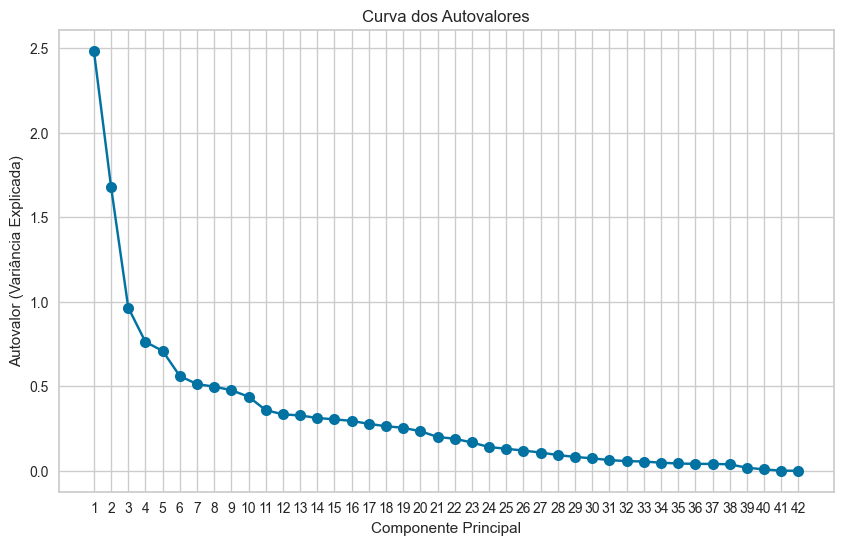

In [66]:
# Obtendo os autovalores (explicados pela variância) dos componentes principais
eigenvalues = pca.explained_variance_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-', markersize=8)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor (Variância Explicada)')
plt.title('Curva dos Autovalores')
plt.xticks(range(1, len(eigenvalues)+1))
plt.grid(True)
plt.show()

In [67]:
# Aplicando PCA para selecionar variáveis
pca = PCA(n_components=6) # Se None todos componentes vão ficar mantidos
pca.fit(abt_processed)
# Extraindo as cargas e criando um DataFrame
loadings = pca.components_
df = pd.DataFrame(loadings, columns=features, index=['PC'+str(i) for i in range(1, loadings.shape[0]+1)])
abt_transposed = df.transpose()


In [68]:
abt_transposed

,PC1,PC2,PC3,PC4,PC5,PC6
Rotatividade_Sim,-0.035515,-0.015003,-0.020739,-0.002799,0.003266,-0.103534
ViagensDeNegocio_Viagens_Frequentes,0.002768,-0.003637,-0.027406,-0.012626,0.011126,-0.024817
ViagensDeNegocio_Viagens_Raras,-0.003893,-0.010884,0.037666,-0.004568,0.000676,0.027693
Departamento_Recursos_Humanos,-0.006197,-0.004961,-0.004716,-0.006926,0.005606,0.002564
Departamento_Vendas,-0.004241,0.000339,-0.016454,-0.027694,0.034634,-0.027218
CampoDeEducacao_Grau Técnico,0.006852,0.000298,0.009486,-0.005641,-0.008476,-0.002409
CampoDeEducacao_Marketing,-0.003895,-0.000848,0.000892,-0.017211,0.011211,-0.017245
CampoDeEducacao_Médica,0.006360,-0.003863,-0.014242,0.044974,0.019913,-0.010535
CampoDeEducacao_Outro,-0.001745,-0.005540,-0.003272,0.000399,-0.002415,0.001519
CampoDeEducacao_Recursos Humanos,-0.005352,-0.002827,-0.004108,-0.003433,0.001334,0.001349


In [69]:
abt_to_model = abt_processed[['Rotatividade_Sim','ViagensDeNegocio_Viagens_Frequentes', 'ViagensDeNegocio_Viagens_Raras','Departamento_Recursos_Humanos',
                              'Departamento_Vendas','CampoDeEducacao_Grau Técnico']]

In [70]:
abt_to_model = pd.concat([abt_to_model,abt_id], axis=1)


Iteração número: 0 - Coeficiente de Silhueta: 0.24982629811593493 - Tempo gasto na iteração: 0.8059937953948975 segundos
Iteração número: 1 - Coeficiente de Silhueta: 0.277461185575955 - Tempo gasto na iteração: 0.6059961318969727 segundos
Iteração número: 2 - Coeficiente de Silhueta: 0.34898548236547927 - Tempo gasto na iteração: 0.660994291305542 segundos
Iteração número: 3 - Coeficiente de Silhueta: 0.3514836809133856 - Tempo gasto na iteração: 0.7320065498352051 segundos
Iteração número: 4 - Coeficiente de Silhueta: 0.36879209502724375 - Tempo gasto na iteração: 0.8059985637664795 segundos
Iteração número: 5 - Coeficiente de Silhueta: 0.39483962830312297 - Tempo gasto na iteração: 0.7669939994812012 segundos
Iteração número: 6 - Coeficiente de Silhueta: 0.42218237699401606 - Tempo gasto na iteração: 0.6920034885406494 segundos
Iteração número: 7 - Coeficiente de Silhueta: 0.45042507142493726 - Tempo gasto na iteração: 0.6339905261993408 segundos


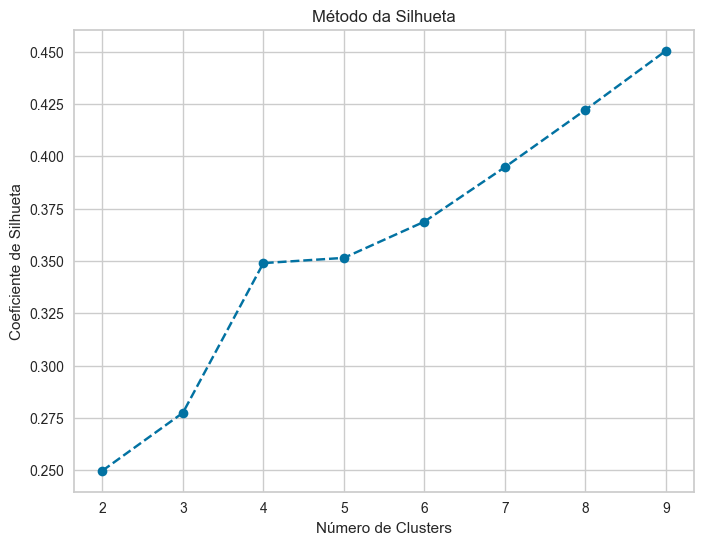

In [71]:
# Calcular a pontuação da silhueta para diferentes números de clusters
silhouette_scores = []
i = 0
k_min = 2
k_max = 10

for n_clusters in range(k_min, k_max):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(abt_to_model)
    # gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    # gmm.fit(df_reduced)
    # cluster_labels = gmm.predict(df_reduced)

    # spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=15, random_state=42)
    # cluster_labels = spectral_clustering.fit_predict(df_reduced)
    silhouette_avg = silhouette_score(abt_to_model, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f'Iteração número: {i} - Coeficiente de Silhueta: {silhouette_avg} - Tempo gasto na iteração: {elapsed_time} segundos')
    i += 1

# Plotar o gráfico do método da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(k_min, k_max), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta')
plt.xticks(range(k_min, k_max))
plt.grid(True)
plt.show()

# 4. MODELAGEM

In [28]:
from sklearn.mixture import GaussianMixture

n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
best_bic = float('inf')  # Inicialize com um valor infinito
best_config = None
bic_scores = []

for cov in covariance_type:
    for n_comp in n_components:
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov, random_state=0)
        gmm.fit(abt_to_model)
        bic_score = gmm.bic(abt_to_model)
        bic_scores.append((cov, n_comp, bic_score))

        if bic_score < best_bic:
            best_bic = bic_score
            best_config = (cov, n_comp)

print("Melhor configuração:", best_config)
print("Menor BIC:", best_bic)

Melhor configuração: ('diag', 9)
Menor BIC: -194464.76592612185


In [29]:
from sklearn.mixture import GaussianMixture
# Inicializar o modelo de Mistura Gaussiana
gmm = GaussianMixture(n_components=9, covariance_type='diag', random_state=0)

# Ajustar o modelo aos dados com parâmetros de inicialização específicos
gmm.fit(abt_to_model)

# Prever os rótulos dos clusters
#labels = gmm.predict(df_reduced)

#df_publico['Cluster'] = labels

#np.unique(labels)

GaussianMixture(covariance_type='diag', n_components=9, random_state=0)

In [30]:
labels = gmm.predict(abt_to_model)
labels

array([0, 4, 5, ..., 2, 0, 2], dtype=int64)

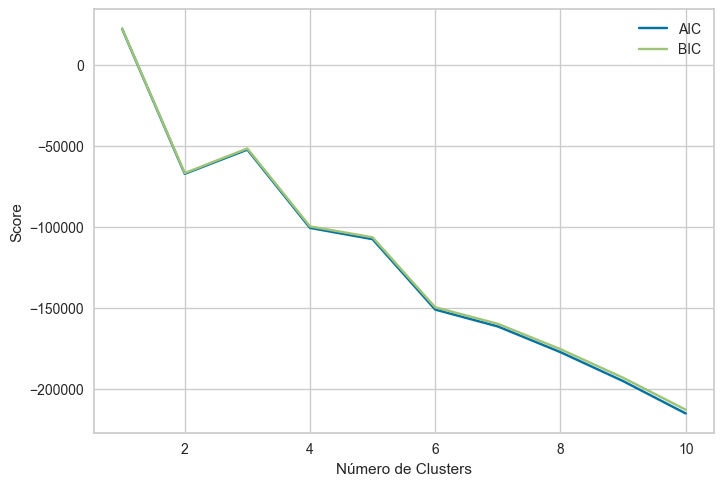

In [31]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Lista para armazenar valores de AIC e BIC
aic_scores = []
bic_scores = []

# Testar diferentes números de clusters
for n_clusters in range(1, 11):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    gmm.fit(abt_to_model)
    aic_scores.append(gmm.aic(abt_to_model))
    bic_scores.append(gmm.bic(abt_to_model))

# Plotar AIC e BIC em função do número de clusters
import matplotlib.pyplot as plt

plt.plot(range(1, 11), aic_scores, label='AIC')
plt.plot(range(1, 11), bic_scores, label='BIC')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# 5. SCORAGEM

Valores mais altos são melhores, indicando que os clusters são bem definidos

In [43]:
X = abt_to_model
cluster = KMeans(n_clusters=4, random_state=0,).fit(X)
calinski_harabasz_score(X, cluster.labels_)

1579.480294471495

o valor 1579,48 indica que os dados estão densamente clusterizados, entretanto cabe para futuras análises verificar uma análise de dimensionalidade característica

# Salvando o Modelo

In [45]:
artifact_pkl_filename = 'modelo.pkl'
local_path = artifact_pkl_filename
with open(local_path, 'wb') as model_file:
  pickle.dump(cluster, model_file)